In [1]:
#add auto reload for src function testing
%load_ext autoreload
%autoreload 2

#let's add the project directory to our module path
import os
import sys

module_path = os.path.abspath(os.path.join(os.pardir, os.pardir))
if module_path not in sys.path:
    sys.path.append(module_path)
    
    
#also import all of our modules
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from src import data_cleaning
from src import cm_functions

#and here is our data directiory
data_folder = '../../data/'

In [2]:
fsm_data = pd.read_csv(data_folder+'fsm_data.csv',dtype={'PIN': 'string'}, index_col=0)
parcels = pd.read_csv(data_folder+'EXTR_Parcel_final.csv',dtype={'Major': 'string', 'Minor':'string', 'PIN': 'string'})
res_bldg = pd.read_csv(data_folder+'EXTR_ResBldg_final.csv', dtype={'Major':'string', 'Minor':'string', 'PIN':'string'})

In [3]:
fsm_data

,LogSalePrice,LogSqFt,PIN
0,13.235692,3.285557,2130430120
1,12.983101,3.295567,9406520630
2,13.017003,3.033424,1402810020
3,12.170445,3.245513,1245500098
4,13.199324,3.093422,7973202320
...,...,...,...
28251,14.001990,3.459392,9290850760
28252,12.999065,3.155336,4059400095
28253,13.429848,3.356026,3816700025
28254,13.521139,3.352183,6150200505


# Does a waterfront affect home value in a way that helps our model?

In [8]:
second_model_data = pd.merge(fsm_data, parcels, how='inner', on='PIN')

In [13]:
second_model_data['is_waterfront'] = (second_model_data['WfntLocation'] != 0).astype('int')
second_model_data.is_waterfront.sum()

394

In [15]:
second_model_data = second_model_data.loc[:,['LogSalePrice', 'LogSqFt', 'is_waterfront', 'PIN']]
second_model_data

,LogSalePrice,LogSqFt,is_waterfront,PIN
0,13.235692,3.285557,0,2130430120
1,12.983101,3.295567,0,9406520630
2,13.017003,3.033424,0,1402810020
3,12.170445,3.245513,0,1245500098
4,13.199324,3.093422,0,7973202320
...,...,...,...,...
28203,14.001990,3.459392,0,9290850760
28204,12.999065,3.155336,0,4059400095
28205,13.429848,3.356026,0,3816700025
28206,13.521139,3.352183,0,6150200505


In [16]:
test_df = second_model_data.loc[:,['LogSalePrice', 'LogSqFt', 'is_waterfront']]

## Now let's test it

In [18]:
model = cm_functions.get_fsm(test_df)

Rsquared: 0.34863648431421757
BETA values:
Intercept        8.017084
LogSqFt          1.638537
is_waterfront    0.418290
dtype: float64
------------------------------------
 
                            OLS Regression Results                            
Dep. Variable:           LogSalePrice   R-squared:                       0.349
Model:                            OLS   Adj. R-squared:                  0.349
Method:                 Least Squares   F-statistic:                     7548.
Date:                Thu, 18 Jun 2020   Prob (F-statistic):               0.00
Time:                        12:11:14   Log-Likelihood:                -15829.
No. Observations:               28208   AIC:                         3.166e+04
Df Residuals:                   28205   BIC:                         3.169e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                    coef    std err

Lagrange Multiplier p-value: 0.0
F-statistic p-value: 0.0


The null hypothesis is homoscedasticity, alternative hypothesis is heteroscedasticity.    Thus returning a low p-value means that the current model violates the homoscedasticity assumption


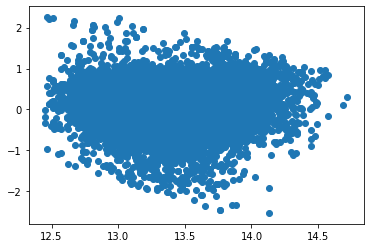

In [19]:
cm_functions.lr_homoscad(model,test_df)

In [20]:
cm_functions.lr_linear(model)

Rainbow statistic: 0.9647774939243181
Rainbow p-value: 0.9833742619453025


(0.9647774939243181, 0.9833742619453025)

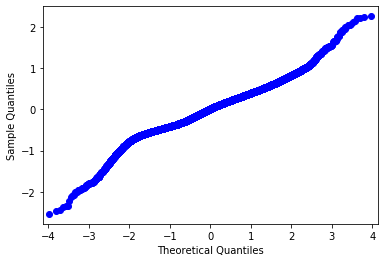

In [21]:
cm_functions.lr_normality(model)

In [22]:
second_model_data.to_csv(data_folder+'model_2.csv')